In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [2]:
DATADIR = 'dataset-resized/'
CATEGORIES = ['trash','plastic']
IMG_SIZE=100

TypeError: Image data of dtype object cannot be converted to float

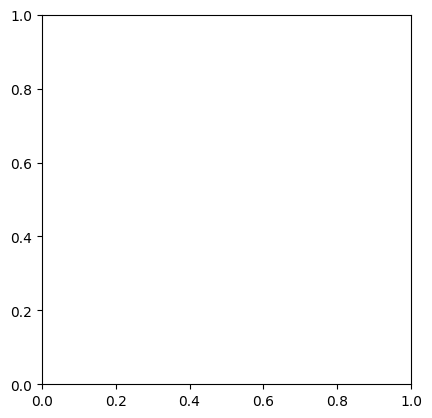

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    #break

In [ ]:
cols=2
rows=4
col_index=0
row_index=0
f, axarr = plt.subplots(rows,cols,figsize=(12, 12))
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        axarr[row_index,col_index].imshow(img_array)
        axarr[row_index,col_index].set_title(category+str(row_index)+str(col_index))
        print(category,row_index,col_index)
        break
    col_index=col_index+1
    if(col_index==cols):
        row_index=row_index+1
        col_index=0

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

In [ ]:
print(len(training_data))

In [ ]:
lenofimage = len(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape

In [ ]:
X = X/255.0

In [ ]:
X[1]

In [ ]:
y=np.array(y)

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result